In [1]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.utils import load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array

In [11]:
# Define path to the data directory
data_dir = "./celebrities"

# Initialize ImageDataGenerator for data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0,1]
    shear_range=0.2,  # Randomly apply shearing transformations
    zoom_range=0.2,  # Randomly zooming inside pictures
    horizontal_flip=True,  # Randomly flip half of the images horizontally
    validation_split=0.2  # Use 20% of the data for validation
)

# Generator for the training data
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Set as training data
)

# Generator for the validation data
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Set as validation data
)

Found 14071 images belonging to 105 classes.
Found 3463 images belonging to 105 classes.


In [12]:
# Load the VGG16 model
model = VGG16(weights='imagenet', include_top=False)

# Define directory and create a database of features
img_directory = './celebrities/'

# Initialize ImageDataGenerator for data preprocessing
datagen = ImageDataGenerator(
   rescale=1./255,  # Normalize pixel values to [0,1]
   preprocessing_function=preprocess_input  # preprocess_input is the function imported from keras.applications.vgg16
)

# Set up the generator to fetch images from the directory
generator = datagen.flow_from_directory(
    img_directory,
    target_size=(224, 224),
    batch_size=32,  # Define your own batch size
    class_mode=None,  # We only need images, not labels
    shuffle=False  # Keep data in original order
)

# Create a database of features
img_features = {}

# Process images, extracting features in batches
for i in range(len(generator)):
    images_batch = generator[i]  # Get a batch of images
    features_batch = model.predict(images_batch)  # Extract features for this batch
    
    # Store the features in img_features
    for j, features in enumerate(features_batch):
        img_path = generator.filepaths[i * generator.batch_size + j]
        img_features[img_path] = features.flatten()
    
    print(f"Processed batch {i + 1}/{len(generator)}")

# Save the image features for future use, in case you don't want to compute it every time
np.save('img_features.npy', img_features)


Found 17534 images belonging to 105 classes.
1/1 [==============================] - 3s 3s/step
Processed batch 1/548
1/1 [==============================] - 3s 3s/step
Processed batch 2/548
1/1 [==============================] - 3s 3s/step
Processed batch 3/548
1/1 [==============================] - 3s 3s/step
Processed batch 4/548
1/1 [==============================] - 3s 3s/step
Processed batch 5/548
1/1 [==============================] - 3s 3s/step
Processed batch 6/548
1/1 [==============================] - 3s 3s/step
Processed batch 7/548
1/1 [==============================] - 3s 3s/step
Processed batch 8/548
1/1 [==============================] - 4s 4s/step
Processed batch 9/548
1/1 [==============================] - 3s 3s/step
Processed batch 10/548
1/1 [==============================] - 5s 5s/step
Processed batch 11/548
1/1 [==============================] - 6s 6s/step
Processed batch 12/548
1/1 [==============================] - 5s 5s/step
Processed batch 13/548
1/1 [==========

In [10]:
from sklearn.metrics.pairwise import cosine_similarity
import operator

# Load the image features
img_features = np.load('img_features.npy', allow_pickle=True).item()

# Process query image
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))  # Load image
    img = img_to_array(img)  # Convert image to array
    img = np.expand_dims(img, axis=0)  # Add an extra dimension
    img = preprocess_input(img)  # Preprocess image
    return img

# Extract features of the query image
def extract_features(img):
    return model.predict(img).flatten()

# Compute cosine similarity
def compute_similarity(query_features):
    similarity = {}
    for img_path, features in img_features.items():
        similarity[img_path] = cosine_similarity([query_features], [features])[0][0]
    return similarity

# Return top 10 similar images
# Return top 10 unique similar images
def get_top_10(similarity):
    sorted_similarity = sorted(similarity.items(), key=operator.itemgetter(1), reverse=True)
    unique_images = []
    for img in sorted_similarity:
        if img[0] not in unique_images:
            unique_images.append(img[0])
        if len(unique_images) == 15:
            break
    return unique_images

# Set the path of the query image
query_image_path = 'Brad.jpg'  # Change to your image path

# Preprocess the query image
query_img = preprocess_image(query_image_path)

# Extract features of the query image
query_features = extract_features(query_img)

# Compute similarity
similarity = compute_similarity(query_features)

# Get top 10 similar images
top_10_images = get_top_10(similarity)

# Print or display the images
for i, img_path in enumerate(top_10_images):
    print(f"Image {i+1}: {img_path}")

1/1 [==============================] - 0s 122ms/step
Image 1: ./Celebrity_small/Brad Pitt/002_cc1b9701.jpg
Image 2: ./Celebrity_small/Leonardo DiCaprio/040_3a2c98cd.jpg
Image 3: ./Celebrity_small/Hugh Jackman/046_de6d6bf0.jpg
Image 4: ./Celebrity_small/Will Smith/004_af9b4c7c.jpg
Image 5: ./Celebrity_small/Hugh Jackman/029_c6e0a7f3.jpg
Image 6: ./Celebrity_small/Robert Downey Jr/012_e3dd7d69.jpg
Image 7: ./Celebrity_small/Denzel Washington/095_0a05b6dc.jpg
Image 8: ./Celebrity_small/Robert Downey Jr/035_e4be5129.jpg
Image 9: ./Celebrity_small/Tom Cruise/024_e7356978.jpg
Image 10: ./Celebrity_small/Tom Cruise/047_e8a911aa.jpg
Image 11: ./Celebrity_small/Leonardo DiCaprio/075_c2c28553.jpg
Image 12: ./Celebrity_small/Leonardo DiCaprio/053_8bfac05e.jpg
Image 13: ./Celebrity_small/Robert Downey Jr/021_d1cfd3e9.jpg
Image 14: ./Celebrity_small/Hugh Jackman/076_b53060b4.jpg
Image 15: ./Celebrity_small/Denzel Washington/068_d9509f11.jpg


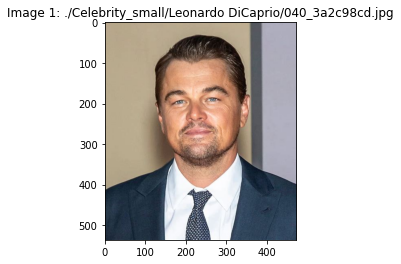

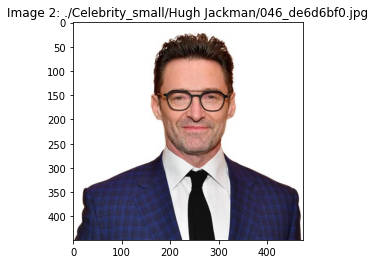

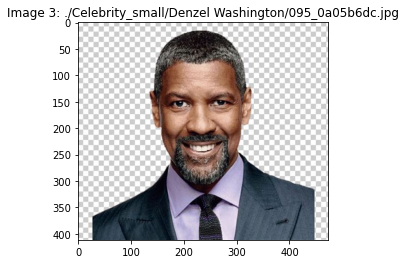

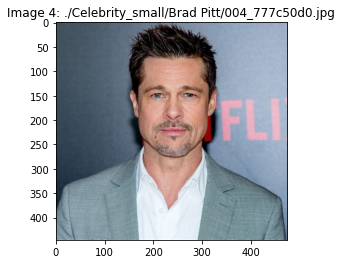

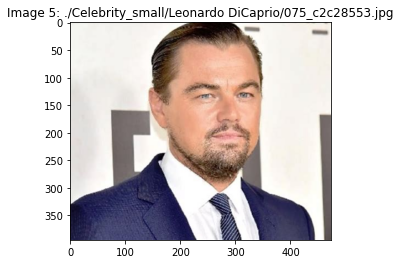

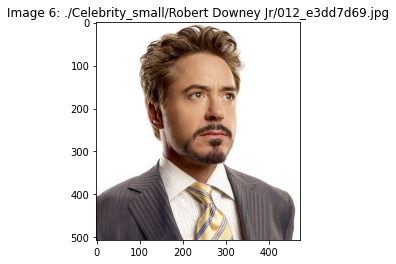

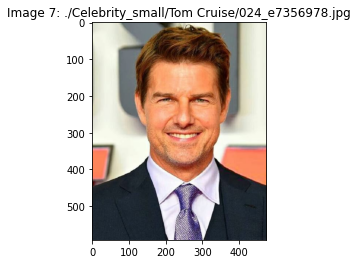

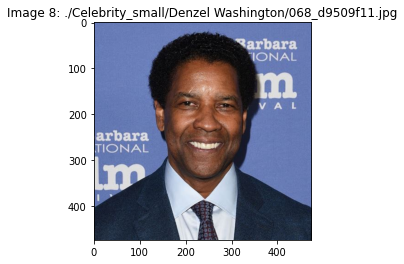

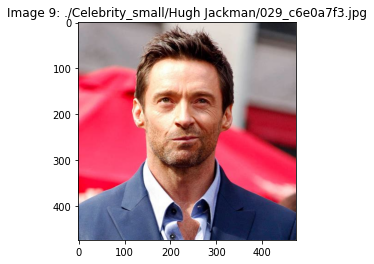

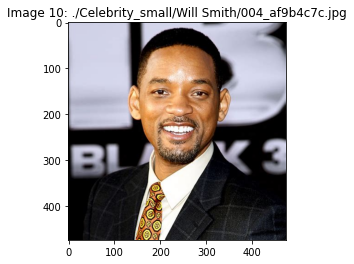

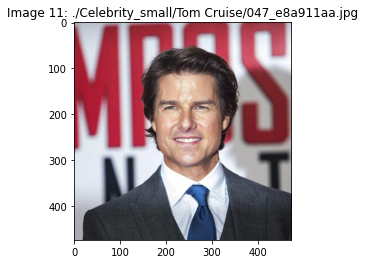

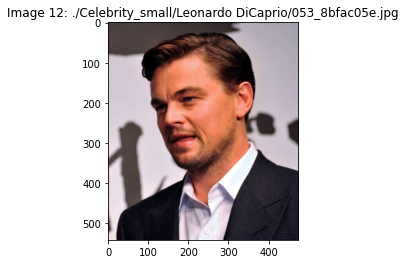

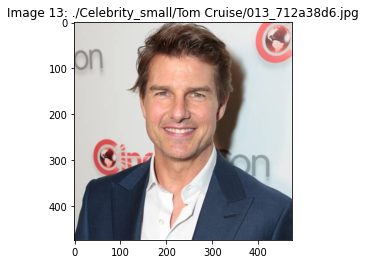

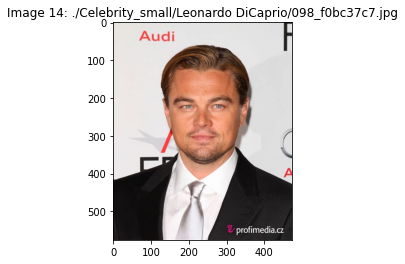

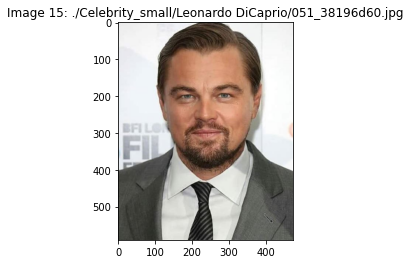

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Print and display the images
for i, img_path in enumerate(top_10_images):
    img = mpimg.imread(img_path)  # Read the image file
    plt.figure(i)  # Create a new figure for this image
    imgplot = plt.imshow(img)  # Display the image
    plt.title(f"Image {i+1}: {img_path}")  # Set the title of the figure
plt.show()  # Display all the figures

In [11]:
from sklearn.metrics.pairwise import cosine_similarity

# Load the saved features
img_features = np.load('img_features.npy', allow_pickle=True).item()

# Define your query image path
query_img_path = '/content/Bill.jpg'

# Extract features for the query image
query_img_features = extract_features(query_img_path)

# Compute similarity scores
similarity_scores = {}
for img_name, features in img_features.items():
    similarity_scores[img_name] = cosine_similarity([query_img_features], [features])[0][0]

# Sort images based on the similarity scores
sorted_img_names = sorted(similarity_scores, key=similarity_scores.get, reverse=True)


# Display top 5 images
for img_path in sorted_img_names[:5]:
    img = mpimg.imread(img_path)
    plt.figure()
    plt.imshow(img)
    plt.title(f"Similarity: {similarity_scores[img_path]}")
    plt.axis('off')
    plt.show()


NameError: name 'extract_features' is not defined

In [8]:
import os

print(os.path.exists('img_features.npy'))  # This will print True if the file exists, False otherwise

True
